In [1]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalli

ERROR: Operation cancelled by user


### Library

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.applications import ResNet50
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.initializers import he_normal, glorot_uniform
from time import time



### Charger le google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1-Download the X and y data using the load function from the numpy package.

In [3]:
# Charger les données X et y
X = np.load('/content/gdrive/MyDrive/data/X.npy')
y = np.load('/content/gdrive/MyDrive/data/y.npy')

### 2-Plot 8 images and show their labels.

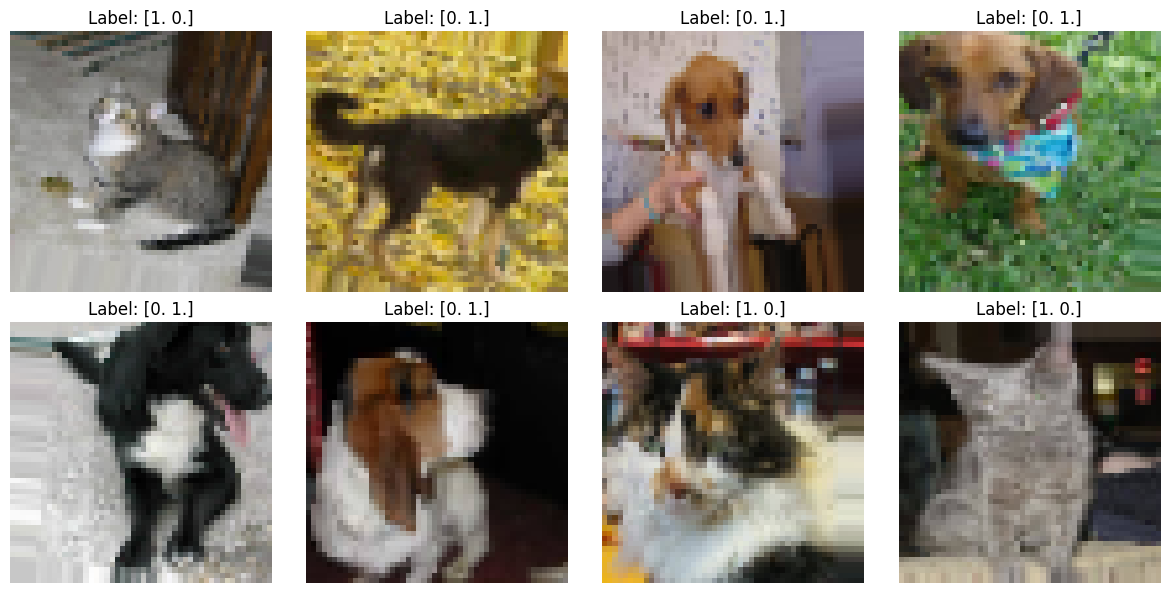

In [4]:
# Sélectionner aléatoirement 8 images et leurs étiquettes
indices = np.random.choice(range(X.shape[0]), 8, replace=False)
selected_images = X[indices]
selected_labels = y[indices]

# Afficher les 8 images et leurs étiquettes
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.set_title(f"Label: {selected_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

<p> Nous pouvons voir ici que la class [1. 0.] correspond au chat et la class [0. 1.] correspond au chien. </p>

### 3-Split the data on train and test set (12 %).

In [5]:
# Vérifier les dimensions des ensembles pour s'assurer de la séparation
X.shape, y.shape

((10000, 50, 50, 3), (10000, 2))

In [6]:
# Séparation des données en ensembles d'entraînement et de test (12 % pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

In [7]:
# Vérifier les dimensions des ensembles pour s'assurer de la séparation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8800, 50, 50, 3), (1200, 50, 50, 3), (8800, 2), (1200, 2))

In [ ]:
# Normaliser les données d'image pour accélérer l'apprentissage
#X_train = X_train / 255.0
#X_test = X_test / 255.0

### 4. Define a first learning model without the CNN cell with 4 hidden dense layers and give the validation and test scores.

In [8]:
# Définir le modèle
model = Sequential([
    Flatten(input_shape=(50, 50, 3),name="InputLayer"), # Aplatir les images d'entrée avec Flatten
    Dense(256, activation='relu',name="Dense_n1"), # Premier couche dense (couche caché)
    Dense(128, activation='relu',name="Dense_n2"), # Deuxieme couche dense (couche caché)
    Dense(64, activation='relu',name="Dense_n3"), # Troisième couche dense (couche caché)
    Dense(2, activation='softmax',name="Output") # Couche de sortie pour classification binaire
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 7500)              0         
                                                                 
 Dense_n1 (Dense)            (None, 256)               1920256   
                                                                 
 Dense_n2 (Dense)            (None, 128)               32896     
                                                                 
 Dense_n3 (Dense)            (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 2)                 130       
                                                                 
Total params: 1,961,538
Trainable params: 1,961,538
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compiler le modèle en définissant les paramètres
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Callbacks
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
mc = ModelCheckpoint('model_best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [12]:
#Entrainement du model
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.12, callbacks=[es ,mc])
# Charger le meilleur modèle enregistré
saved_model = load_model('model_best.h5')

Epoch 1/50
78/78 [==============================] - ETA: 0s - loss: 0.8206 - accuracy: 0.5210
Epoch 1: val_accuracy improved from -inf to 0.49811, saving model to model_best.h5
78/78 [==============================] - 5s 48ms/step - loss: 0.8206 - accuracy: 0.5210 - val_loss: 0.7253 - val_accuracy: 0.4981
Epoch 2/50
77/78 [============================>.] - ETA: 0s - loss: 0.6868 - accuracy: 0.5562
Epoch 2: val_accuracy improved from 0.49811 to 0.54545, saving model to model_best.h5
78/78 [==============================] - 3s 36ms/step - loss: 0.6866 - accuracy: 0.5563 - val_loss: 0.7145 - val_accuracy: 0.5455
Epoch 3/50
77/78 [============================>.] - ETA: 0s - loss: 0.6758 - accuracy: 0.5816
Epoch 3: val_accuracy did not improve from 0.54545
78/78 [==============================] - 3s 36ms/step - loss: 0.6756 - accuracy: 0.5819 - val_loss: 0.7745 - val_accuracy: 0.5360
Epoch 4/50
77/78 [============================>.] - ETA: 0s - loss: 0.6826 - accuracy: 0.5797
Epoch 4: val_a

In [13]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

38/38 [==============================] - 0s 6ms/step - loss: 0.6779 - accuracy: 0.5642
Test Loss: 0.6778560876846313
Test Accuracy: 0.5641666650772095


### 5. Write a function for plotting the predicted labels. The result should indicate the probability of the predicted label with blue color if the prediction is correct otherwise in the red color.

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predicted_label = np.argmax(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    # Convertir true_label en entier
    true_label = np.argmax(true_label)

    # Afficher la prédiction en bleu si elle est correcte, sinon en rouge
    color = 'blue' if predicted_label == true_label else 'red'

    # Définir les noms de classes
    class_names = ['Chat', 'Chien']

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

1/1 [==============================] - 0s 19ms/step


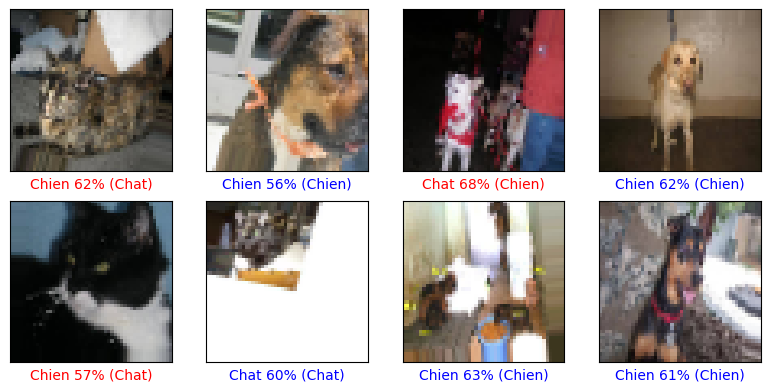

In [15]:
num_rows = 2
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
random_indices = np.random.choice(len(X_test), num_images, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(idx, saved_model.predict(X_test[idx].reshape(1, 50, 50, 3)), y_test[idx], X_test[idx])

plt.tight_layout()
plt.show()

<p> Nous pouvons voir que le model nous ressort bien en bleu (bonne prédiction), rouge (mauvaise prédiction) les class prédite avec le pourcentage de prédiction pour ces class. De plus, nous pouvons retrouver juste a coté du pourcentage de prédition la véritable class entre parenthése. </p>

### 6. Train a second model using the following CNN structure Conv −pool −conv −pool −conv −conv − pool − dense − dense.


In [16]:
# Définir le modèle CNN
model_cnn = Sequential([
    # Première couche de convolution et max pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),

    # Deuxième couche de convolution et max pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Troisième et quatrième couches de convolution, suivies d'un max pooling
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Aplatir le résultat pour le connecter aux couches denses
    Flatten(),

    # Couches denses
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # 2 classes
])

In [17]:
# Compiler le modèle
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)        

In [18]:
# Callbacks
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')
mc = ModelCheckpoint('model_cnn_best.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)


In [19]:
# Entraîner le modèle
history_cnn = model_cnn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=100,
    validation_split=0.12,  # Utilisation de 12% des données d'entraînement pour la validation
    callbacks=[es, mc]
)

# Charger le meilleur modèle enregistré
model_cnn_best = load_model('model_cnn_best.h5')

Epoch 1/50
78/78 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.5502
Epoch 1: val_accuracy improved from -inf to 0.60795, saving model to model_cnn_best.h5
78/78 [==============================] - 48s 559ms/step - loss: 0.6846 - accuracy: 0.5502 - val_loss: 0.6548 - val_accuracy: 0.6080
Epoch 2/50
78/78 [==============================] - ETA: 0s - loss: 0.6509 - accuracy: 0.6173
Epoch 2: val_accuracy improved from 0.60795 to 0.63163, saving model to model_cnn_best.h5
78/78 [==============================] - 39s 507ms/step - loss: 0.6509 - accuracy: 0.6173 - val_loss: 0.6394 - val_accuracy: 0.6316
Epoch 3/50
78/78 [==============================] - ETA: 0s - loss: 0.6326 - accuracy: 0.6414
Epoch 3: val_accuracy improved from 0.63163 to 0.68087, saving model to model_cnn_best.h5
78/78 [==============================] - 42s 534ms/step - loss: 0.6326 - accuracy: 0.6414 - val_loss: 0.6099 - val_accuracy: 0.6809
Epoch 4/50
78/78 [==============================] - ETA

### 7. Compute the validation and test scores.

In [20]:
# Évaluer le modèle sur l'ensemble de test
test_loss_cnn, test_accuracy_cnn = model_cnn_best.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss_cnn}")
print(f"Test Accuracy: {test_accuracy_cnn}")

38/38 [==============================] - 3s 68ms/step - loss: 0.6206 - accuracy: 0.7525
Test Loss: 0.620603084564209
Test Accuracy: 0.7524999976158142


### 8. Train one transfert learning approaches from the Keras API (not the same seen during the course).


In [21]:
# Charger ResNet50 pré-entraîné sans la couche supérieure
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [22]:
# Geler toutes les couches du modèle de base pour empêcher leur modification pendant l'entraînement
for layer in base_model.layers:
    layer.trainable = False

In [23]:
# Ajouter des couches personnalisées
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Ajouter un pooling pour réduire la dimensionnalité
x = Dense(1024, activation='relu')(x)  # Ajouter une couche dense
predictions = Dense(2, activation='softmax')(x)  # Couche de sortie pour 2 classes


In [24]:
# Créer le nouveau modèle
model_transfer = Model(inputs=base_model.input, outputs=predictions)


In [25]:
# Compiler le modèle
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
# Afficher le résumé du modèle
model_transfer.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [27]:
# Callback
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max')
mc = ModelCheckpoint('best_resnet50_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)


In [28]:
# Entraîner le modèle avec les callbacks
history_transfer = model_transfer.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.12,
    callbacks=[es, mc]
)

# Charger le meilleur modèle sauvegardé
best_model = load_model('best_resnet50_model.h5')


Epoch 1/50
242/242 [==============================] - ETA: 0s - loss: 0.7107 - accuracy: 0.5501
Epoch 1: val_accuracy improved from -inf to 0.51231, saving model to best_resnet50_model.h5
242/242 [==============================] - 118s 471ms/step - loss: 0.7107 - accuracy: 0.5501 - val_loss: 0.7006 - val_accuracy: 0.5123
Epoch 2/50
242/242 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.5730
Epoch 2: val_accuracy improved from 0.51231 to 0.60511, saving model to best_resnet50_model.h5
242/242 [==============================] - 109s 452ms/step - loss: 0.6813 - accuracy: 0.5730 - val_loss: 0.6668 - val_accuracy: 0.6051
Epoch 3/50
242/242 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.5789
Epoch 3: val_accuracy did not improve from 0.60511
242/242 [==============================] - 99s 410ms/step - loss: 0.6700 - accuracy: 0.5789 - val_loss: 0.7536 - val_accuracy: 0.5038
Epoch 4/50
242/242 [==============================] - ETA: 0s - loss: 

In [29]:
# Évaluer le meilleur modèle sur l'ensemble de test
test_loss_transfer, test_accuracy_transfer = best_model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss_transfer}")
print(f"Test Accuracy: {test_accuracy_transfer}")

38/38 [==============================] - 15s 364ms/step - loss: 0.6468 - accuracy: 0.6217
Test Loss: 0.6468273401260376
Test Accuracy: 0.621666669845581


### 9. Put the best test scores of the three models in a unique table and print it.

In [30]:
# Stockage des meilleurs scores des trois modèles
best_test_scores = {
    "Model_Transfer_Learning": test_accuracy_transfer,
    "Model_CNN": test_accuracy_cnn,
    "Model": test_accuracy
}

# Trouver le meilleur score de test parmi les trois modèles
best_model = max(best_test_scores, key=best_test_scores.get)
best_test_accuracy = best_test_scores[best_model]

# Afficher le tableau des meilleurs scores
print("Best Test Scores:")
print("{:<30} {:<15}".format("Model", "Test Accuracy"))
print("-" * 45)
for model, accuracy in best_test_scores.items():
    print("{:<30} {:<15.4f}".format(model, accuracy))

# Afficher le meilleur score de test
print("\nBest Model:")
print("{:<30} {:<15.4f}".format(best_model, best_test_accuracy))

Best Test Scores:
Model                          Test Accuracy  
---------------------------------------------
Model_Transfer_Learning        0.6217         
Model_CNN                      0.7525         
Model                          0.5642         

Best Model:
Model_CNN                      0.7525         


### 10. Fine tune the two hyperparameters : dropout and kernel initialzers of the deep neural network obtained in question 5 using scikit-learn.

### 11. Train a CNN denoising autoencoder on the data and illustrate your model using some images.To constract the noisy image, use a normal distribution with mean equal to 0.1 and varianceequal to 0.3. Try to reduce the inial size of images at least by factor 10 (compute this rateand write it in a comment).